In [4]:
# Importing library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

In [5]:
# Importing datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [76]:
# Quick look at datasets
display(train.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [75]:
display(test.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [18]:
# Summary stats of our data
print(train.describe())
print(test.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [93]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   LotShape       1460 non-null   object
 6   LandContour    1460 non-null   object
 7   Utilities      1460 non-null   object
 8   LotConfig      1460 non-null   object
 9   LandSlope      1460 non-null   object
 10  Neighborhood   1460 non-null   object
 11  Condition1     1460 non-null   object
 12  Condition2     1460 non-null   object
 13  BldgType       1460 non-null   object
 14  HouseStyle     1460 non-null   object
 15  OverallQual    1460 non-null   int64 
 16  OverallCond    1460 non-null   int64 
 17  YearBuilt      1460 non-null   int64 
 18  YearRemodAdd   1460 non-null

In [94]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1459 non-null   int64 
 1   MSSubClass     1459 non-null   int64 
 2   LotArea        1459 non-null   int64 
 3   Street         1459 non-null   object
 4   LotShape       1459 non-null   object
 5   LandContour    1459 non-null   object
 6   LotConfig      1459 non-null   object
 7   LandSlope      1459 non-null   object
 8   Neighborhood   1459 non-null   object
 9   Condition1     1459 non-null   object
 10  Condition2     1459 non-null   object
 11  BldgType       1459 non-null   object
 12  HouseStyle     1459 non-null   object
 13  OverallQual    1459 non-null   int64 
 14  OverallCond    1459 non-null   int64 
 15  YearBuilt      1459 non-null   int64 
 16  YearRemodAdd   1459 non-null   int64 
 17  RoofStyle      1459 non-null   object
 18  RoofMatl       1459 non-null

In [ ]:
# Looks like there are null-values in our data

In [53]:
# Data cleaning
missing_train = train.isnull().sum()
missing_train = missing_train[missing_train > 0]
print('# of nulls in train dataset')
display(missing_train)

# of nulls in train dataset


Series([], dtype: int64)

In [ ]:
# Extremely high number of nulls found in Alley, PoolQC, Fence, and MiscFeature. Will drop since they likely won't correlate with price

In [47]:
missing_test = test.isnull().sum()
missing_test = missing_test[missing_test > 0]
print('# of nulls in test dataset')
display(missing_test)

# of nulls in test dataset


Series([], dtype: int64)

In [54]:
# Final decision to drop all columns with missing values
train.drop(missing_train.index, axis=1, inplace=True)

In [25]:
print('# of duplicates in train dataset:')
train.duplicated().sum()

# of duplicates in train dataset:


np.int64(0)

In [26]:
print('# of duplicates in test dataset:')
test.duplicated().sum()

# of duplicates in test dataset:


np.int64(0)

In [ ]:
# No duplicates found

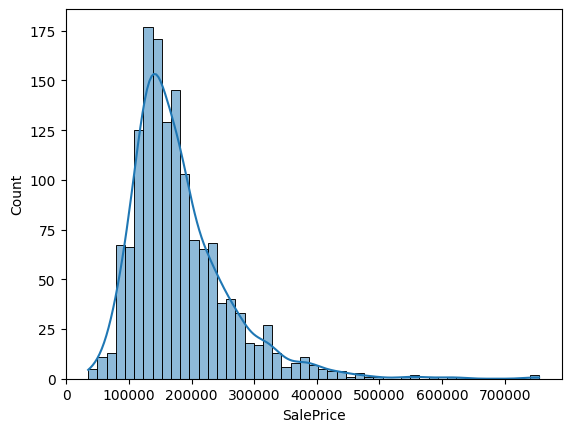

In [152]:
sns.histplot(train.SalePrice, kde=True)
plt.show()
plt.close()

In [151]:
skewness = train['SalePrice'].skew()
print(skewness)
# Skewed to the right, outliers shown in histogram

1.8828757597682129


In [51]:
numeric = train.select_dtypes(include=['int64', 'float64'])

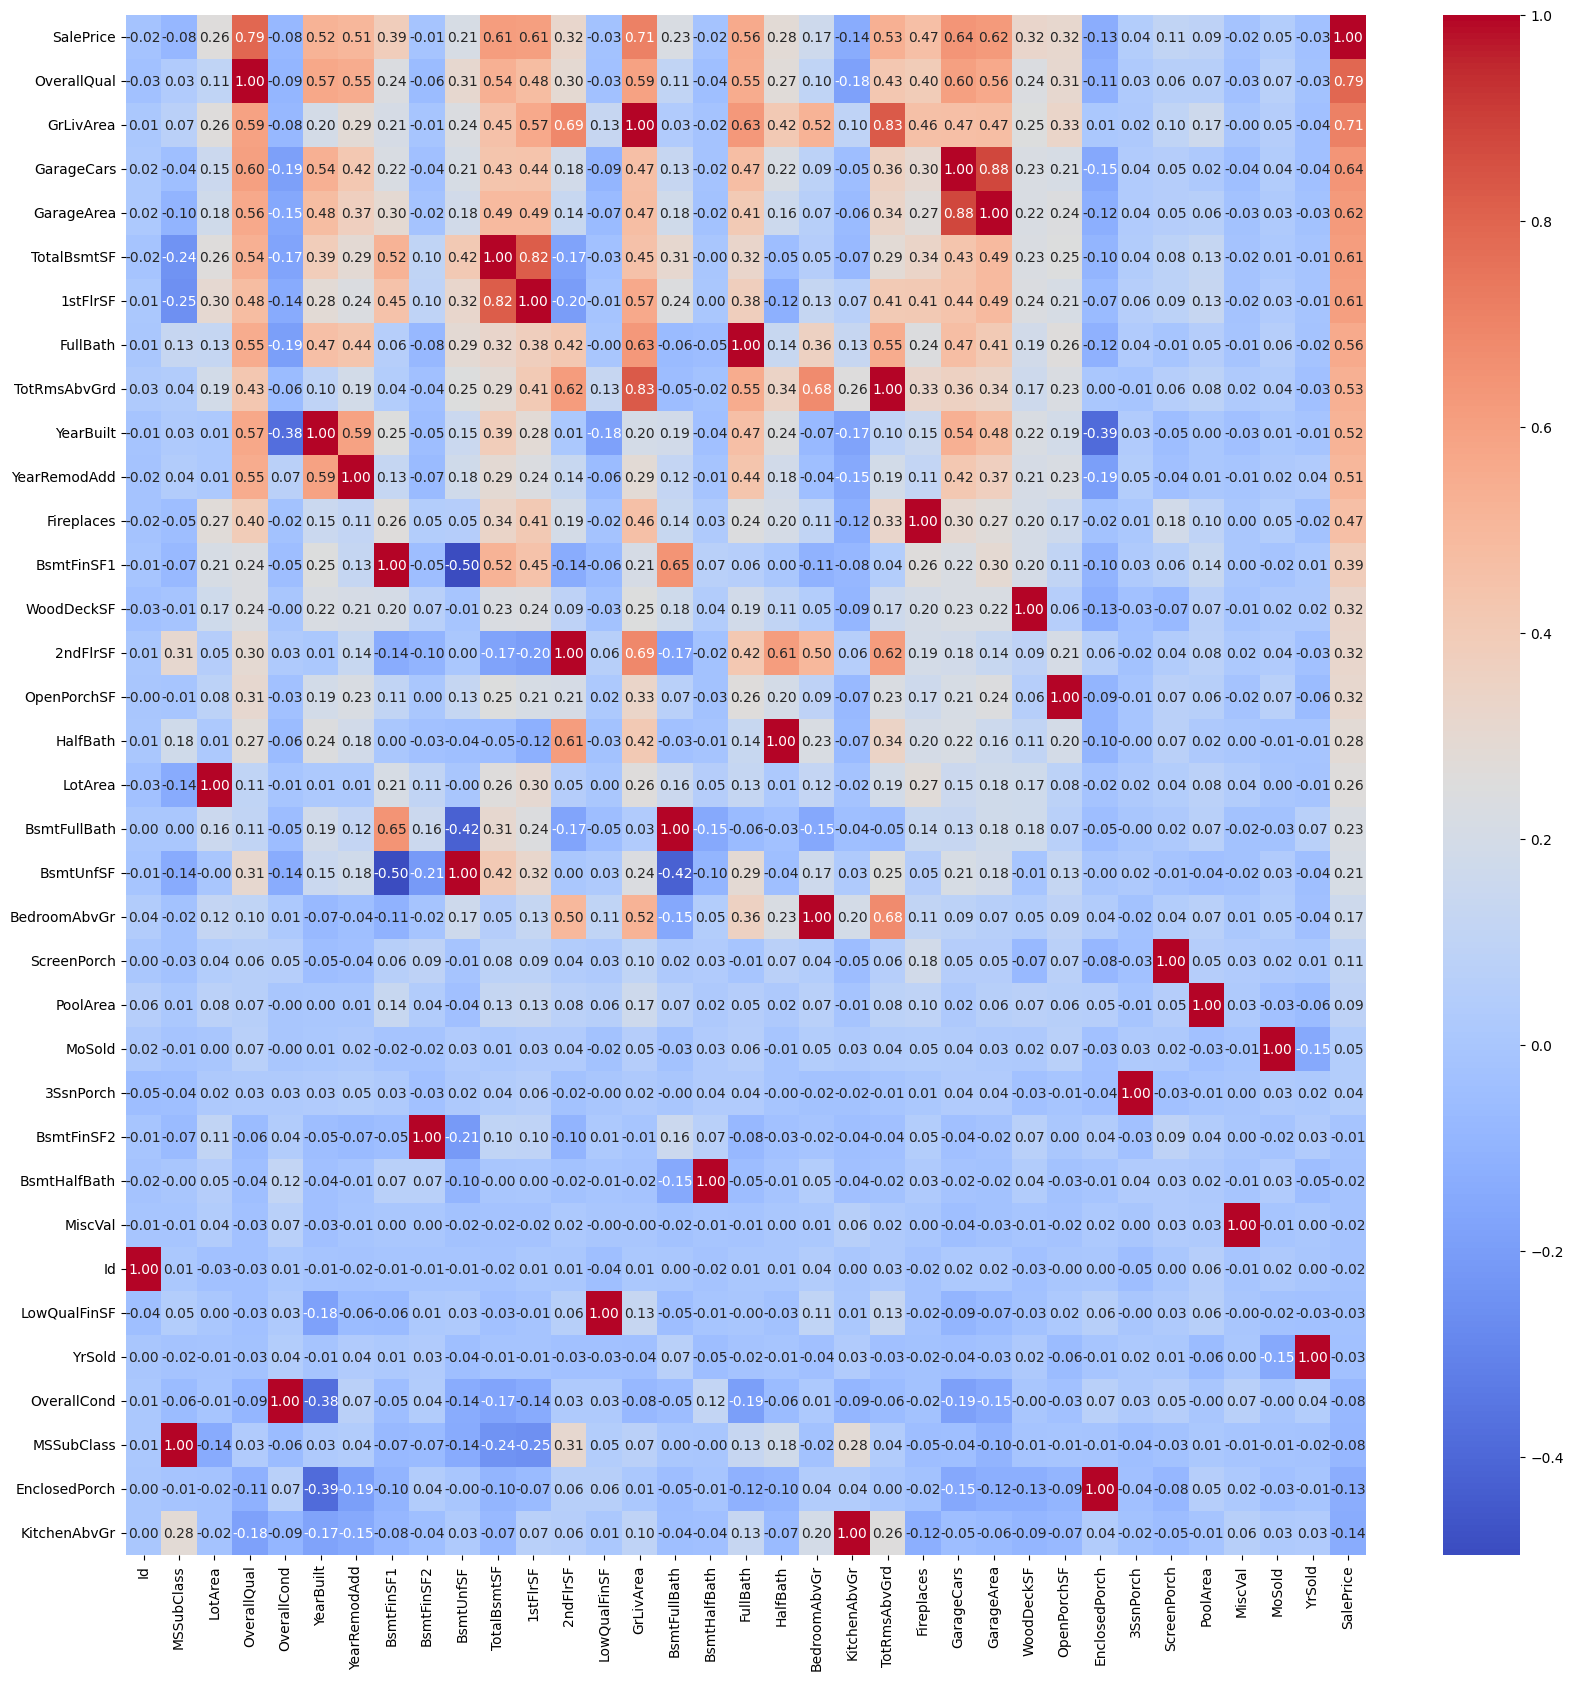

In [143]:
# Numeric features and their correlation with SalePrice
correlation_matrix = numeric.corr()
correlation_matrix_sorted = correlation_matrix.sort_values(by='SalePrice', ascending=False)
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix_sorted, annot=True, cmap='coolwarm', fmt="0.2f")
plt.show()

In [92]:
num_col = train.select_dtypes(include=['int64', 'float64'])
num_col = num_col.drop(columns=['SalePrice'])
num_col_names = num_col.columns.to_list()

In [91]:
# Introduce categorical variables
X_encoded = pd.get_dummies(train)
encoded_names = X_encoded.columns.to_list()

In [58]:
display(X_encoded)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,False,False,False,True,False,False,False,False,True,False
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,False,False,False,True,False,False,False,False,True,False
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,False,False,False,True,False,False,False,False,True,False
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,False,False,False,True,False,False,False,False,True,False


In [ ]:
# Building the RandomForest model

In [23]:
X = train[num_col_names]
y = train['SalePrice']

In [59]:
train_X, val_X, train_y, val_y = train_test_split(X_encoded, y, random_state=1)

In [ ]:
# Finding max leaf nodes and n estimator that best optimizes RMSE

In [42]:
def get_rmse(max_leaf_nodes, train_X, train_y):
    model = RandomForestRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1)
    model.fit(train_X, train_y)
    val_predictions = model.predict(val_X)
    rmse = root_mean_squared_error(val_y, val_predictions)
    return(rmse)

In [48]:
L = [5, 25, 50, 100, 500, 1000, 1500, 2000, 2500]
for i in L:
    print(get_rmse(i, train_X, train_y))

40316.7795990468
30166.322531763308
28427.34030312553
27610.52731752582
27188.301283216257
27184.905971805398
27184.905971805398
27184.905971805398
27184.905971805398


In [ ]:
# Best max leaf node is 1000

In [46]:
def get_rmse2(n_estimators, train_X, train_y):
    model = RandomForestRegressor(n_estimators=n_estimators, max_leaf_nodes=1000, random_state=1)
    model.fit(train_X, train_y)
    val_predictions = model.predict(val_X)
    rmse2 = root_mean_squared_error(val_y, val_predictions)
    return(rmse2)

In [49]:
for i in L:
    print(get_rmse2(i, train_X, train_y))

30566.62955789066
27253.227485245934
27255.28289174062
27184.905971805398
26837.06632343332
26633.23302354704
26627.45808870317
26657.410141310287
26644.78747560698


In [ ]:
# best n estimator is 1500

In [ ]:
# We will use max_leaf_node-1000 and n_estimator=1500 for our final model

In [60]:
model = RandomForestRegressor(n_estimators=1500, max_leaf_nodes=1000, random_state=1)
model.fit(train_X, train_y)

,n_estimators,1500
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,1000
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [63]:
val_predictions = model.predict(val_X)

In [90]:
rmse = root_mean_squared_error(val_y, val_predictions)
r2 = r2_score(val_y, val_predictions)
print('RMSEE:', rmse, 'R-squared:', r2)

RMSEE: 6536.067648405803 R-squared: 0.9936364175236351


In [84]:
# Encode both train and test then align them

In [80]:
test_encoded = pd.get_dummies(test)

In [82]:
X_all, test_all = X_encoded.align(test_encoded, join='left', axis=1, fill_value=0)

In [ ]:
# Creating predictions using the test dataset

In [83]:
test_pred = model.predict(test_all)

In [ ]:
# Submission file for the competition

In [86]:
submission = pd.DataFrame({
    "ID": test['Id'],
    "SalePrice": test_pred})

In [87]:
submission.to_csv('submission.csv', index=False)